## Import Libraries.

In [165]:
import seaborn as sns
import pandas as pd
import matplotlib as plt
from matplotlib import style
%matplotlib inline

## Import dataset. Filter by piece and piece color. Drop excess columns, keeping only end square and piece code.

In [166]:
piece_code = "Q1"
move_color = "white"

In [167]:
df = pd.read_csv("C:\\Users\\chris\\Documents\\Datasets\\Chess PGN\\pgn_move_records.csv", dtype={"eco": str})
df = df[(df["piece_code"] == piece_code) & (df["move_color"] == move_color)]
df = df[["end_square.x", "end_square.y", "piece_code"]]
df.head()

,end_square.x,end_square.y,piece_code
8,4,4,Q1
12,4,1,Q1
28,4,6,Q1
35,2,8,Q1
44,4,4,Q1


## Group by square and count occurrences.

In [168]:
df = df.groupby(["end_square.x", "end_square.y"]).count().reset_index()
df.rename(columns = {"piece_code" : "move_count"}, inplace = True)
df.head()

,end_square.x,end_square.y,move_count
0,1,1,4
1,1,2,2
2,1,3,4
3,1,4,46
4,1,5,16


## Fill our table with zeros and replace our x-values with letters so our heatmap resembles a chessboard.

In [169]:
for x in range(1,9):
    for y in range(1,9):
        if (x not in list(df["end_square.x"])) or (y not in list(df["end_square.y"])):
            df2 = {"end_square.x" : x, "end_square.y" : y, "move_count": 0}
            df = df.append(df2, ignore_index = True)

In [170]:
df["end_square.x"] = df["end_square.x"].replace(1, "a")
df["end_square.x"] = df["end_square.x"].replace(2, "b")
df["end_square.x"] = df["end_square.x"].replace(3, "c")
df["end_square.x"] = df["end_square.x"].replace(4, "d")
df["end_square.x"] = df["end_square.x"].replace(5, "e")
df["end_square.x"] = df["end_square.x"].replace(6, "f")
df["end_square.x"] = df["end_square.x"].replace(7, "g")
df["end_square.x"] = df["end_square.x"].replace(8, "h")

## Create a pivot table from our data. Fill empty/NA cells with 0.

In [171]:
df_pivot = df.pivot_table(index="end_square.y", columns="end_square.x", values="move_count", fill_value=0, dropna=False)
df_pivot

end_square.x,a,b,c,d,e,f,g,h
end_square.y,,,,,,,,
1,4,6,7,36,14,7,3,3
2,2,6,30,86,134,18,14,4
3,4,36,46,112,64,156,38,31
4,46,31,52,119,60,48,73,22
5,16,45,30,68,52,35,34,74
6,24,14,43,28,36,35,20,28
7,33,59,31,27,29,53,44,32
8,14,10,11,40,18,13,9,19


## Create heatmap using Seaborn.

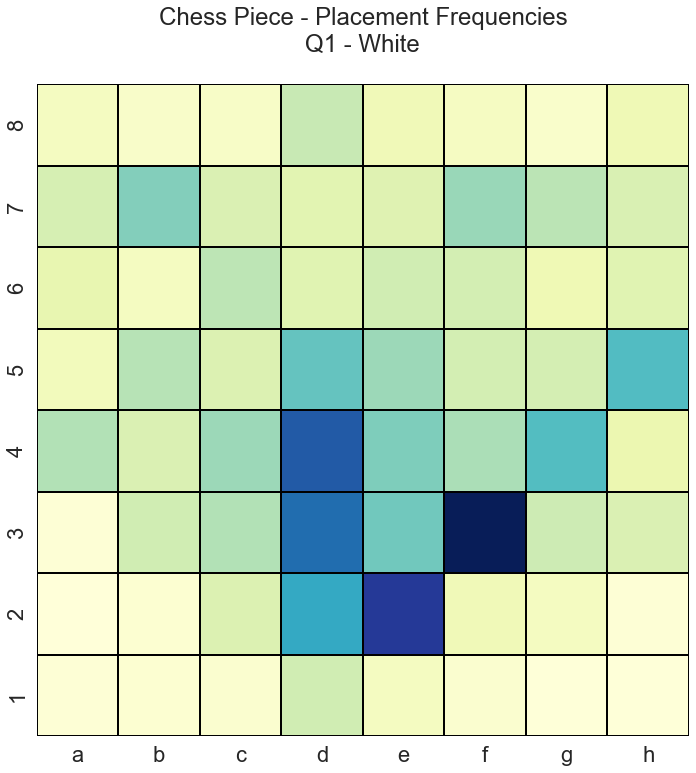

In [174]:
sns.set(rc = {"figure.figsize" : (12,12)})
sns.set(font_scale = 2)
heatmap = sns.heatmap(df_pivot, fmt="d", cmap="YlGnBu", square=True, xticklabels=True, yticklabels=True, linewidths=2, linecolor="black", cbar=False)
heatmap.invert_yaxis()
heatmap.set(xlabel=None, ylabel=None)
heatmap.set_title(f"Chess Piece - Placement Frequencies\n{piece_code} - {move_color.capitalize()}\n")
heatmap.tick_params(left=False, bottom=False)

In [175]:
fig = heatmap.get_figure()
fig.savefig("chess-heatmap.png") 